In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow.keras import Model, layers
import numpy as np

In [2]:
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).
# Training parameters.
learning_rate = 0.1
training_steps = 2000
batch_size = 256
display_step = 100
# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

In [11]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to one-hot encoded labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(100, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

Epoch 1/10
1563/1563 [==============================] - 60s 37ms/step - loss: 3.9703 - accuracy: 0.0920 - val_loss: 3.5135 - val_accuracy: 0.1604
Epoch 2/10
1563/1563 [==============================] - 54s 34ms/step - loss: 3.2829 - accuracy: 0.2036 - val_loss: 3.1308 - val_accuracy: 0.2376
Epoch 3/10
1563/1563 [==============================] - 65s 42ms/step - loss: 2.9685 - accuracy: 0.2639 - val_loss: 2.9083 - val_accuracy: 0.2775
Epoch 4/10
1563/1563 [==============================] - 70s 45ms/step - loss: 2.7560 - accuracy: 0.3048 - val_loss: 2.8223 - val_accuracy: 0.2920
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 2.6188 - accuracy: 0.3324 - val_loss: 2.7024 - val_accuracy: 0.3159
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 2.4999 - accuracy: 0.3564 - val_loss: 2.6232 - val_accuracy: 0.3346
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 2.4002 - accuracy: 0.3779 - val_loss: 2.5747 -

In [12]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming n_hidden_1, n_hidden_2, num_classes are defined earlier in your code

class NeuralNet(tf.keras.Model):
    # Set Layers.
    def __init__(self):
        super(NeuralNet, self).__init__()

        # First fully-connected hidden Layer.
        self.fc1 = layers.Dense(n_hidden_1, activation=tf.nn.relu)

        # Second fully-connected hidden Layer.
        self.fc2 = layers.Dense(n_hidden_2, activation=tf.nn.relu)

        # Output layer.
        self.out = layers.Dense(num_classes, activation=tf.nn.softmax)

    # Set forward pass.
    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)

        if not is_training:
            # tf cross entropy expects logits without softmax,
            # so only apply softmax when not training.
            x = tf.nn.softmax(x)

        return x

# Build neural network model.
neural_net = NeuralNet()

In [14]:
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation
    with tf.GradientTape() as g:
        # Forward pass
        pred = neural_net(x, is_training=True)

        # Compute Loss
        loss = cross_entropy_loss(pred, y)

    # Variables to update, i.e., trainable variables
    trainable_variables = neural_net.trainable_variables

    # Compute gradients
    gradients = g.gradient(loss, trainable_variables)

    # Update W and b following gradients
    optimizer.apply_gradients(zip(gradients, trainable_variables))

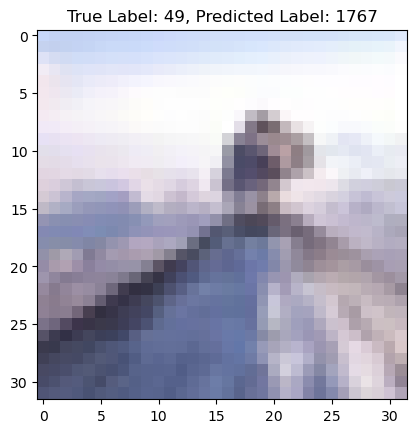

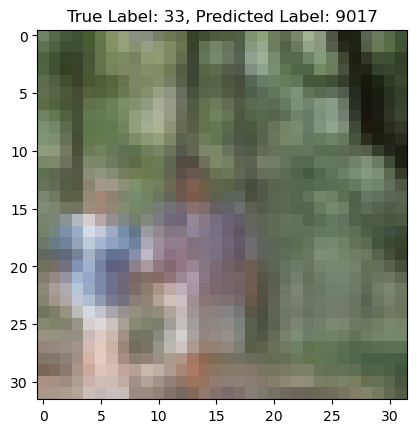

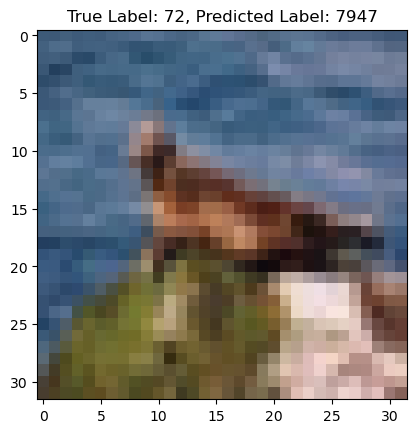

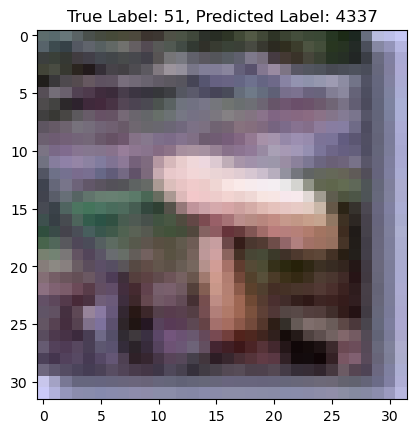

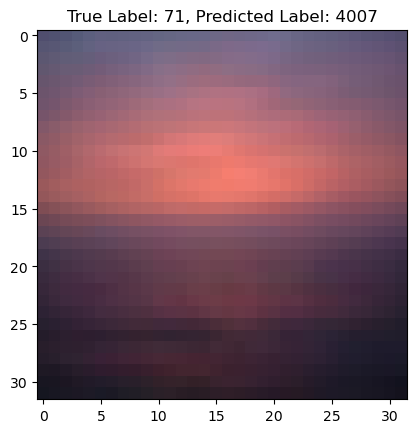

In [16]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a neural network model named 'neural_net' and the test set 'x_test'
n_images = 5
test_images = x_test[:n_images]
true_labels = y_test[:n_images]

# Predictions from the model
predictions = neural_net(test_images)

# Display images and model predictions
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [32, 32, 3]), cmap='gray')

    plt.title(f'True Label: {np.argmax(true_labels[i])}, Predicted Label: {np.argmax(predictions[i].numpy())}')
    plt.show()

# 2 Keras Sequential API

In [17]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop

In [18]:
batch_size=128
num_classes=10
epochs=20

In [5]:
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()
print('Shape-x:\t',xtrain.shape)
print('Shape-y:\t',ytrain.shape)


Shape-x:	 (60000, 28, 28)
Shape-y:	 (60000,)


In [6]:
xtrain=xtrain.reshape(60000,784)
xtest=xtest.reshape(10000,784)
print('Shape-x-train:\t',xtrain.shape)
print('Shape-x-Test:\t',xtest.shape)

Shape-x-train:	 (60000, 784)
Shape-x-Test:	 (10000, 784)


In [7]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

In [8]:
xtrain=xtrain/255.
xtest=xtest/255.

# Print the shape of data

In [9]:
print(xtrain.shape[0],'train samples')
print(xtest.shape[0],'test samples')

60000 train samples
10000 test samples


# Convert class vectors to binary class matrices

In [10]:
import keras
ytrain=keras.utils.to_categorical(ytrain,num_classes)
ytest=keras.utils.to_categorical(ytest,num_classes)


In [11]:
ytrain.shape

(60000, 10)

# Sequential Model

In [12]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Compile the model

In [20]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [21]:
histroy=model.fit(xtrain,ytrain,
 batch_size=batch_size,
 epochs=epochs,
 verbose=2,
 validation_data=(xtest,ytest))
score=model.evaluate(xtest,ytest,verbose=1)


Epoch 1/20
469/469 - 7s - loss: 0.5415 - accuracy: 0.8009 - val_loss: 0.4993 - val_accuracy: 0.8151 - 7s/epoch - 15ms/step
Epoch 2/20
469/469 - 7s - loss: 0.3731 - accuracy: 0.8608 - val_loss: 0.4300 - val_accuracy: 0.8484 - 7s/epoch - 15ms/step
Epoch 3/20
469/469 - 6s - loss: 0.3311 - accuracy: 0.8767 - val_loss: 0.3930 - val_accuracy: 0.8544 - 6s/epoch - 14ms/step
Epoch 4/20
469/469 - 7s - loss: 0.3055 - accuracy: 0.8863 - val_loss: 0.3527 - val_accuracy: 0.8741 - 7s/epoch - 16ms/step
Epoch 5/20
469/469 - 7s - loss: 0.2841 - accuracy: 0.8938 - val_loss: 0.3600 - val_accuracy: 0.8743 - 7s/epoch - 14ms/step
Epoch 6/20
469/469 - 6s - loss: 0.2693 - accuracy: 0.8988 - val_loss: 0.3615 - val_accuracy: 0.8730 - 6s/epoch - 13ms/step
Epoch 7/20
469/469 - 7s - loss: 0.2549 - accuracy: 0.9040 - val_loss: 0.3639 - val_accuracy: 0.8763 - 7s/epoch - 14ms/step
Epoch 8/20
469/469 - 6s - loss: 0.2434 - accuracy: 0.9078 - val_loss: 0.3627 - val_accuracy: 0.8822 - 6s/epoch - 14ms/step
Epoch 9/20
469/4

In [23]:
print('Test Loss:\t',score[0])
print('Test Accuracy:\t',score[1])

Test Loss:	 0.5848789215087891
Test Accuracy:	 0.8590999841690063
